<h3>Importing all required libraries</h3>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#reading the data from CSV file
df = pd.read_csv('titanic.csv')

In [18]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
df.shape

(891, 12)

<h3>Understanding the data</h3>

In [20]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<h3>How many people survived?</h3>

Text(0.5, 1.0, 'Survived')

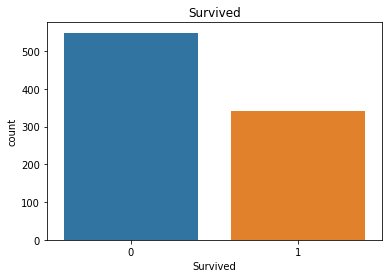

In [13]:
sns.countplot('Survived', data = df)
plt.title('Survived')

As we can see very less number of people survived

Let's further understand what factors effected the survival

<h3>Is there any relation between gender and survival?</h3>

In [22]:
df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

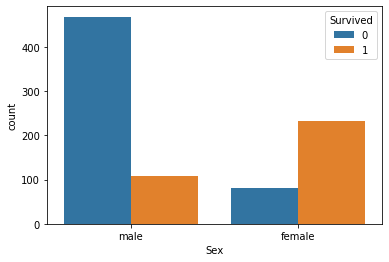

In [23]:
sns.countplot('Sex',hue = 'Survived', data = df)

From is graph we can clearly see that gender does effect the survival.
If you are female you have more chances of survival as compared to male

<h3> Relation between Passengers class and Survival</h3>

In [21]:
df.groupby(['Pclass', 'Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

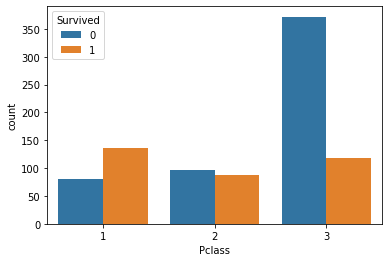

In [24]:
sns.countplot('Pclass', hue = 'Survived', data = df)

Watching above visualization we can interpret that:

1. There are more people in 3rd class then other two classes also 3rd class have more deaths
2. People who took 1st class ticket survived more then other two classes
3. 2nd Class have less people plus very less people survived as compared to other two classes

<h3>Relation between Age and Survival</h3>

As we have seen earliar that there is missing data in the age column, this will effect the visualization and understanding.
So we will fill the NaN values with the mean of age

In [25]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [4]:
df['Age']=df['Age'].fillna(df['Age'].mean())
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

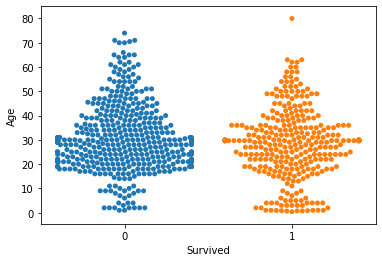

In [19]:
sns.swarmplot(df['Survived'],df['Age'])

From above swarm plot we can interpret that the people of age from 20 to 30 are more dead.
<br>
Also children survived more , especially of age from 0 to 10.
<br>
Also the most aged person on ship survived.

<h3>Let's see more relation between <i>Gender, Age, Survival.<i></h3>

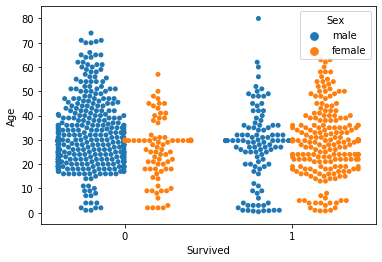

In [20]:
sns.swarmplot(df['Survived'],df['Age'], hue = 'Sex', data = df, split = True)

<b>By plotting this swarm plot we can clearly see that children and females survived more, might be because they were given more priority.<b>
<p>